# Dividir los datos en 80%/20%, train/test

In [124]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

df = pd.read_csv('./datos/Advertising.csv')
lines = df['TV'].count()
value = lines * 0.8
value2 = lines * 0.2
df_train = df.sample(frac=0.8,random_state=42)
df_test = df.drop(df_train.index)
df_train.head()


,Unnamed: 0,TV,radio,newspaper,sales
95,96,163.3,31.6,52.9,16.9
15,16,195.4,47.7,52.9,22.4
30,31,292.9,28.3,43.2,21.4
158,159,11.7,36.9,45.2,7.3
128,129,220.3,49.0,3.2,24.7


# La regresión lineal para publicidad en TV y ventas // Graficar los resultados

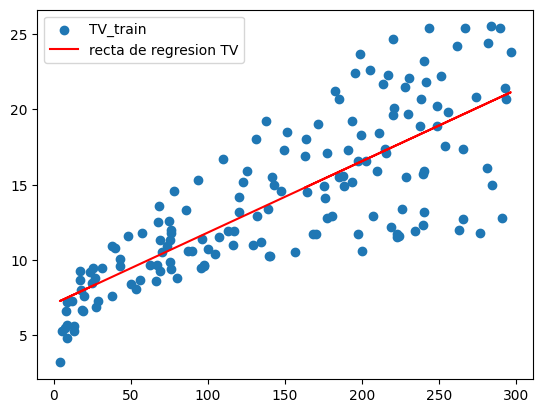

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats

scale = StandardScaler()

x_train = df_train[['TV', 'radio', 'newspaper']] # con doble corchete el resultado es otro DF
y_train = df_train[['sales']] #el resultado es una Serie

X = sm.add_constant(x_train) #Añade una columna de 1nos para poder obtener B, la ordenada al origen
slope, intercept, r_value, p_value, std_err = stats.linregress(x_train['TV'],y_train['sales'])

plt.scatter(x_train['TV'],y_train['sales'],label = 'TV_train' )

plt.plot(X['TV'] ,slope * X['TV'] + intercept, color="red",label='recta de regresion TV')
plt.legend()
plt.show()

# gráfico de tv vs ventas los puntos de testing

R² (test): 0.571
MSE (test): 11.992
RMSE (test): 3.463

Coeficientes del modelo:
TV: 0.047
Intercepto: 7.083


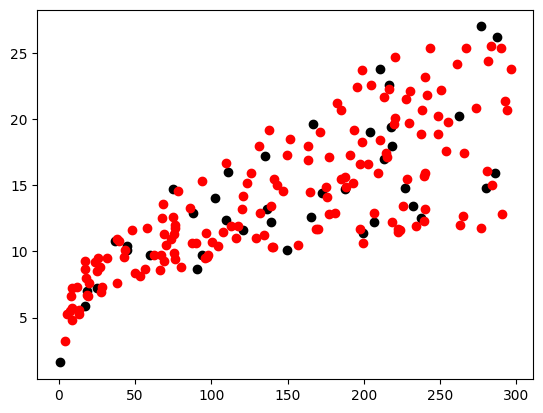

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Variables
x_train = df_train[['TV']]
y_train = df_train['sales']

x_test = df_test[['TV']]
y_test = df_test[['sales']]
# Modelo
modelo = LinearRegression()
modelo.fit(x_train, y_train)

# Predicciones
y_pred = modelo.predict(x_test).ravel()

# Métricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(f"R² (test): {r2:.3f}")
print(f"MSE (test): {mse:.3f}")
print(f"RMSE (test): {rmse:.3f}")

# Coeficientes
print("\nCoeficientes del modelo:")
for name, coef in zip(x_train.columns, modelo.coef_):
    print(f"{name}: {coef:.3f}")

print(f"Intercepto: {modelo.intercept_:.3f}")

plt.scatter(x_test['TV'],y_test['sales'],label = 'TV_test',c='black')
plt.scatter(x_train,y_train,label = 'TV_train' ,c = 'red')
plt.show()



# Calcular R cuadrado

In [127]:
print(f"cuoficionete de determinacion:{r_value ** 2}") 

cuoficionete de determinacion:0.6224477702146687


# Añadir el resto de las variables

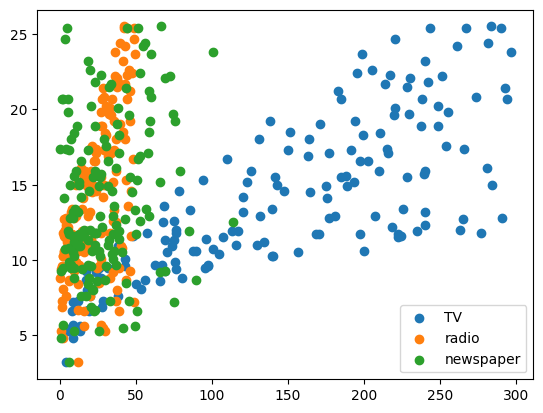

In [132]:
x_train = df_train[['TV','radio','newspaper']]
plt.scatter(x_train['TV'],y_train,label = 'TV' )
plt.scatter(x_train['radio'],y_train,label = 'radio')
plt.scatter(x_train['newspaper'],y_train,label = 'newspaper')
plt.legend()
plt.show()


# Calcular R cuadrado y cuál de las variables es la menos importante

R² (test): 0.860
MSE (test): 3.905
RMSE (test): 1.976

Coeficientes del modelo:
TV: 0.046
radio: 0.191
newspaper: -0.007
Intercepto: 3.102


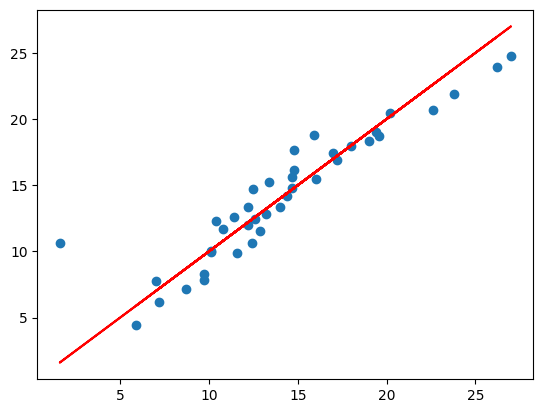

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Variables
X_train = df_train[['TV', 'radio', 'newspaper']]
y_train = df_train['sales']

X_test = df_test[['TV', 'radio', 'newspaper']]
y_test = df_test['sales']

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test).ravel()

# Métricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(f"R² (test): {r2:.3f}")
print(f"MSE (test): {mse:.3f}")
print(f"RMSE (test): {rmse:.3f}")

# Coeficientes
print("\nCoeficientes del modelo:")
for name, coef in zip(X_train.columns, modelo.coef_):
    print(f"{name}: {coef:.3f}")

print(f"Intercepto: {modelo.intercept_:.3f}")
plt.plot(y_test,y_test,color='red')
plt.scatter(y_test,y_pred)
plt.show()
